## 3-8-1

In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# %matplotlib inline
import numpy as np

In [2]:
##################################
#  独自ライブライー： LINE VIEW
# (複数の画像のグラフによる見比べ)
##################################
import cv2;import matplotlib.pyplot as plt;import matplotlib as mpl;from ipywidgets import interact
mpl.rcParams['figure.dpi'] = 140 # グラフで詳細まで見えるように
Imgs_For_Line_View = [] #global変数
Defalut_Y = 20 #global変数

## 使うときは、これを呼ぶ。(双方向バー表示のため、実態をラップ)
def lv( img1, img2=None, img3=None, img4=None, img5=None ):
    global Imgs_For_Line_View
    global Defalut_Y
    Imgs_For_Line_View =  list(filter( lambda x: x is not None, [img1, img2, img3, img4, img5] ) )# Noneを削除
    Defalut_Y = Imgs_For_Line_View[0].shape[0] // 2 # Yの初期値。現状うまく動かず
    interact( lv_real, y = (0, Defalut_Y*2-1, 1) , fig_width=(0,5,0.05), fig_height=(0,5,0.05) ) # 双方向呼び出し

## lvの実体
def lv_real( fig_width=1, fig_height=1, y=Defalut_Y,  ):
    # 図を作成
    plt.figure(figsize=(4 * fig_width,4 * fig_height));plt.xticks(fontsize=4);plt.yticks(fontsize=4)
    # 画像ごとにグラフ線をplot
    for idx, tmp_img in enumerate( Imgs_For_Line_View):
        if  len(tmp_img.shape) >2 and tmp_img.shape[2] >1 : # RGBの３色残ってるときは、白黒に。
            tmp_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        h0, w0 = Imgs_For_Line_View[idx].shape[0], Imgs_For_Line_View[idx].shape[1] # 画像の高さ幅

        # 作図用にピクセルを参照
        tmp_pixel_list=[]
        for x in range(w0):
            pix = tmp_img[y, x]
            tmp_pixel_list.append(pix)
        plt.plot( tmp_pixel_list, label=idx, linewidth = 0.3 )

    plt.legend()
    plt.show()


In [3]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
def mplot(img, img2=None):

    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
        #     plt.subplot(121)
        plt.imshow(im4p)

    else:
        img2 = img2.astype(np.uint8)
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

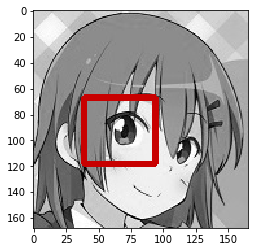

In [4]:

def main():
    img = cv2.imread("sample/3-8/input.png")
    
    
    temp = cv2.imread("sample/3-8/temp.png")
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_SQDIFF)
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    pt = min_pt
    
    cv2.rectangle(img, (pt[0], pt[1]) , (pt[0] + w, pt[1] + h ), (0, 0, 200), 3)
    mplot(img)
#     mplot(temp)

main()

In [5]:
ls sample/3-8/

input.png   result.jpg    sample812.py  sample814.py  sample83.py  test.png
output.png  sample811.py  sample813.py  sample82.py   temp.png


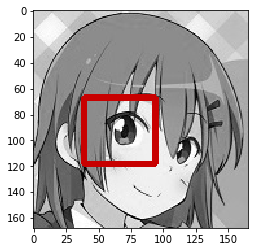

In [6]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)
    
    # 
    h, w = temp.shape
    
    match = cv2.matchTemplate(gray, temp, cv2.TM_CCOEFF_NORMED)
    
    min_value, max_value, min_pt, max_pt = cv2.minMaxLoc(match)
    
    pt = max_pt
    
    cv2.rectangle(img, (pt[0], pt[1]),  (pt[0] + w, pt[1] +h), (0, 0, 200), 3)
    mplot(img)
    
    
main()

## Numpy 版

In [7]:
%pdb off
import pixiedust

Automatic pdb calling has been turned OFF
Pixiedust database opened successfully


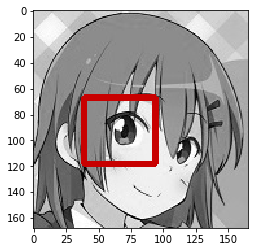

In [8]:
import cv2
import numpy as np


def template_matching_ssd(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    score = np.empty((h-ht, w-wt))

    for dy in range(0, h-ht):
        for dx in range(0, w-wt):
            diff = (src[dy:dy+ht, dx:dx+wt] - temp)**2

            score[dy, dx] = diff.sum()

            pt = np.unravel_index(score.argmin(), score.shape)

    return (pt[1], pt[0])


def main():

    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    h, w = temp.shape

    pt = template_matching_ssd(gray, temp)

    cv2.rectangle(img, (pt[0], pt[1]), (pt[0] + w, pt[1] + h), (0, 0, 200), 3)
    mplot(img)


main()

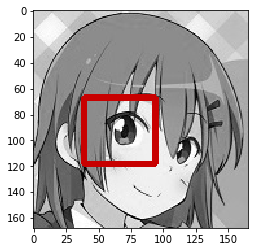

In [30]:
# %%pixie_debugger
import cv2
import numpy as np

score = None

def template_matching_zncc(src, temp):

    h, w = src.shape
    ht, wt = temp.shape

    global score
    score = np.empty((h-ht, w-wt))

    src = np.array(src, dtype="float")
    temp = np.array(temp, dtype="float")

    # テンプレート
    mu_t = np.mean(temp)

    for dy in range(0, h - ht):
        for dx in range(0, w - wt):
            roi = src[dy:dy + ht, dx:dx + wt]

            mu_r = np.mean(roi)

            roi = roi - mu_r

            tmp_temp = temp - mu_t

            num = np.sum(roi * tmp_temp)
            
            den = np.sqrt(np.sum(roi**2)) * np.sqrt(np.sum(tmp_temp**2))
            
            if den == 0:
                score[dy, dx] = 0
            else:
                score[dy, dx] = num / den
            
            
    pt = np.unravel_index(score.argmax(), score.shape)
    
    return (pt[1], pt[0])


def main() :
    img = cv2.imread("sample/3-8/input.png")
    temp = cv2.imread("sample/3-8/temp.png")
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    temp = cv2.cvtColor(temp, cv2.COLOR_RGB2GRAY)

    # テンプレートの画像の高さ・幅
    h, w = temp.shape
    
    pt = template_matching_zncc(gray, temp)
    
#     cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    cv2.rectangle(img, (pt[0], pt[1]  ), (pt[0]+w, pt[1]+h), (0,0,200) , 3)
    
    mplot(img)

main()

In [31]:
lv(score)


interactive(children=(FloatSlider(value=1.0, description='fig_width', max=5.0, step=0.05), FloatSlider(value=1…